<a href="https://colab.research.google.com/github/Akriti3/ECG-Signals/blob/main/Assignment1(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 1

Question1

The ECG signal is given in MATLAB file format as “givenECG3.mat”. Sampling frequency is 360 Hz.

[995 995 995 ... 946 944 943]


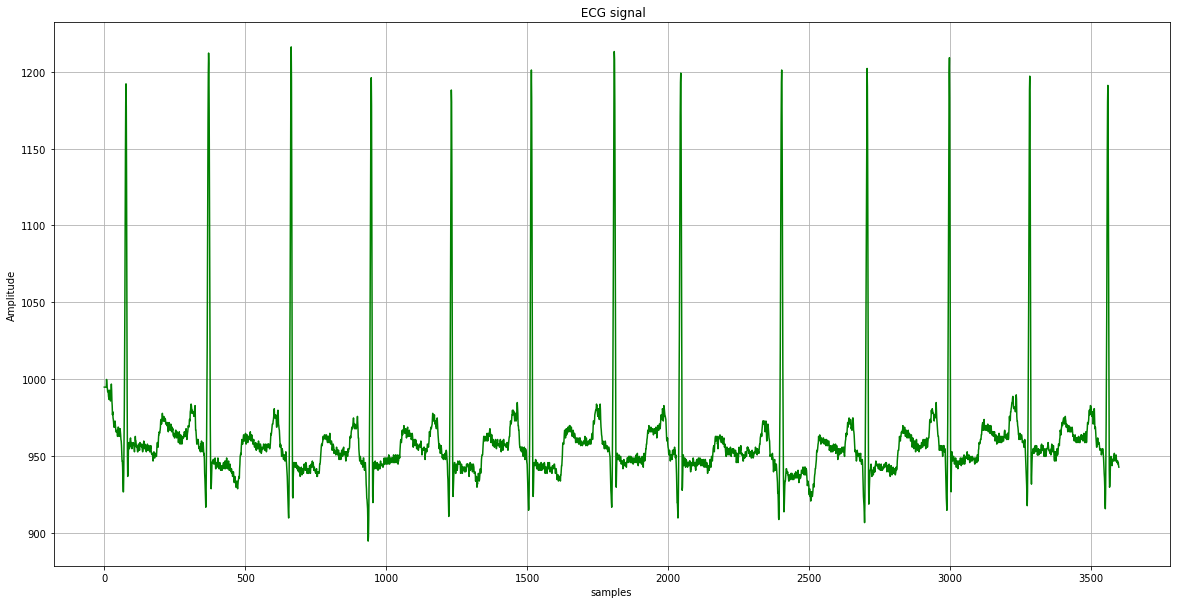

In [ ]:
#importing libraries
import numpy as np
import scipy.io as sio
from scipy.signal import find_peaks
import matplotlib.pyplot as plt

#loading data
data = sio.loadmat('givenECG3.mat')
ecg=np.array(data['givenECG3'][0])
print(ecg)
plt.figure(1,figsize=(20,10))
fs=360
T=1.0/360
plt.plot(ecg, 'g')
plt.grid(True)
plt.title(" ECG signal")
plt.xlabel("samples")
plt.ylabel("Amplitude")
plt.show()

(a) Detect the R-peak in each beat of the ECG signal.


989.0446158611873


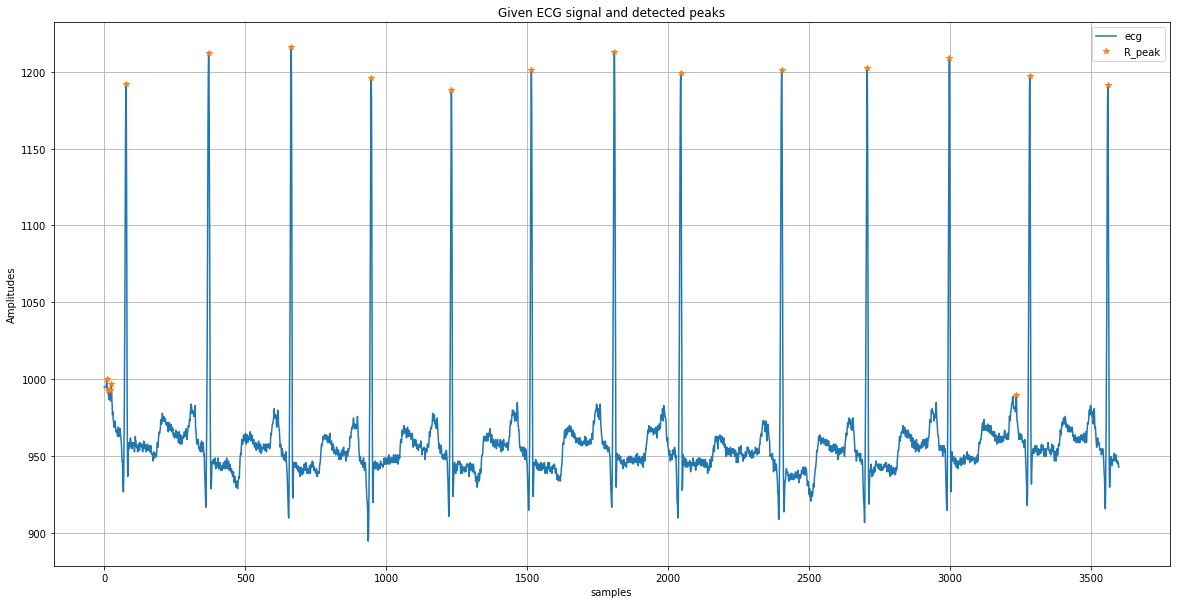

In [ ]:
#importing libraries
import numpy as np
import scipy.io as sio
from scipy.signal import find_peaks
import matplotlib.pyplot as plt

#loading data
data = sio.loadmat('givenECG3.mat')
ecg=np.array(data['givenECG3'][0])

#for finding threshold
#thresh  = np.median(ecg) + 1 * np.std(ecg)
#print (thresh)
#peak detection
R_peaks,_= find_peaks(ecg, 1050)

#plot of ecg signal with peaks
plt.figure(1,figsize=(20,10))
T=1.0/360
plt.plot(ecg)
plt.plot(R_peaks, ecg[R_peaks], "*")
plt.grid(True)
plt.title("Given ECG signal and detected peaks")
plt.legend(["ecg","R_peak"])
plt.xlabel("samples")
plt.ylabel("Amplitudes")
plt.show()


In [ ]:
#(b) Evaluate the RR-interval between the consecutive beats of the ECG signal.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
rr=[] #list for storing rr intervals
for i in range(1,len(R_peaks)):
  rr.append(R_peaks[i]-R_peaks[i-1])
#print(R_peaks[i])
print( "The RR interval is", rr,("sample"))
fs=360
rr_sec = [x /fs for x in rr]
print ("The RR interval is", rr_sec, ("sec"))

#print(x)
#x=np.arange(1,13)
#print(x)
#plt.figure(1,figsize=(20,10))
#plt.plot(x,rr_sec)
#plt.stem(x,rr_sec)
#plt.title("RR interval for different beats")
#plt.xlabel("Beat --->")
#plt.ylabel("Time")
#plt.grid(True)


The RR interval is [293, 293, 284, 284, 284, 294, 236, 358, 303, 292, 285, 277] sample
The RR interval is [0.8138888888888889, 0.8138888888888889, 0.7888888888888889, 0.7888888888888889, 0.7888888888888889, 0.8166666666666667, 0.6555555555555556, 0.9944444444444445, 0.8416666666666667, 0.8111111111111111, 0.7916666666666666, 0.7694444444444445] sec


#(c) Derive the heart rate signal from the ECG (i.e., Plot between the RR-interval and time).


In [ ]:
heart_rate=[]
for i in range(1,len(R_peaks)):
  interval=(R_peaks[i]-R_peaks[i-1])/fs
  heart_rate.append(60/interval)
print("HEART RATE of one minute is", heart_rate)

HEART RATE of one minute is [73.72013651877133, 73.72013651877133, 76.05633802816902, 76.05633802816902, 76.05633802816902, 73.46938775510205, 91.52542372881356, 60.33519553072625, 71.2871287128713, 73.97260273972603, 75.78947368421053, 77.9783393501805]


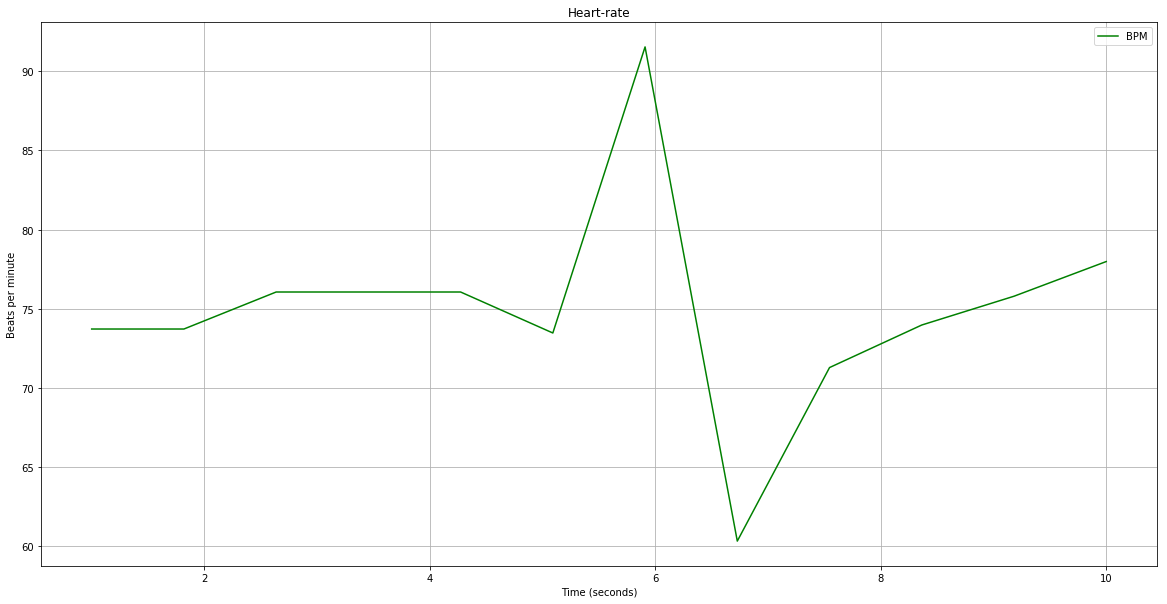

In [ ]:
t=np.linspace(1,10,len(heart_rate))
#print(len(heart_rate))
plt.figure(figsize=(20,10))
plt.plot(t,heart_rate,c='g',label='BPM')

plt.xlabel('Time (seconds)')
plt.ylabel('Beats per minute')
plt.title('Heart-rate')
plt.grid()
plt.legend()

plt.show()



#(d) Evaluate the mean and standard deviation value of the heart rate signal.

In [ ]:
print ("The mean of  Heart signal is:" ,np.mean(heart_rate) )
print ("The standard deviation of  Heart signal is:",np.std(heart_rate)) 

The mean of  Heart signal is: 74.99723655197333
The standard deviation of  Heart signal is: 6.591959655531684


Question-2

Given an ECG signal “inputECG.mat”, add random noise to it. The sampling rate is 360 Hz. (You may use numpy.random package for generating noise)

Perform synchronized averaging to remove the noise. Vary the number of realizations used for reconstruction of ECG signal. Plot the percentage root mean square difference (PRD) value versus the iteration number.


[995 995 995 ... 946 944 943]


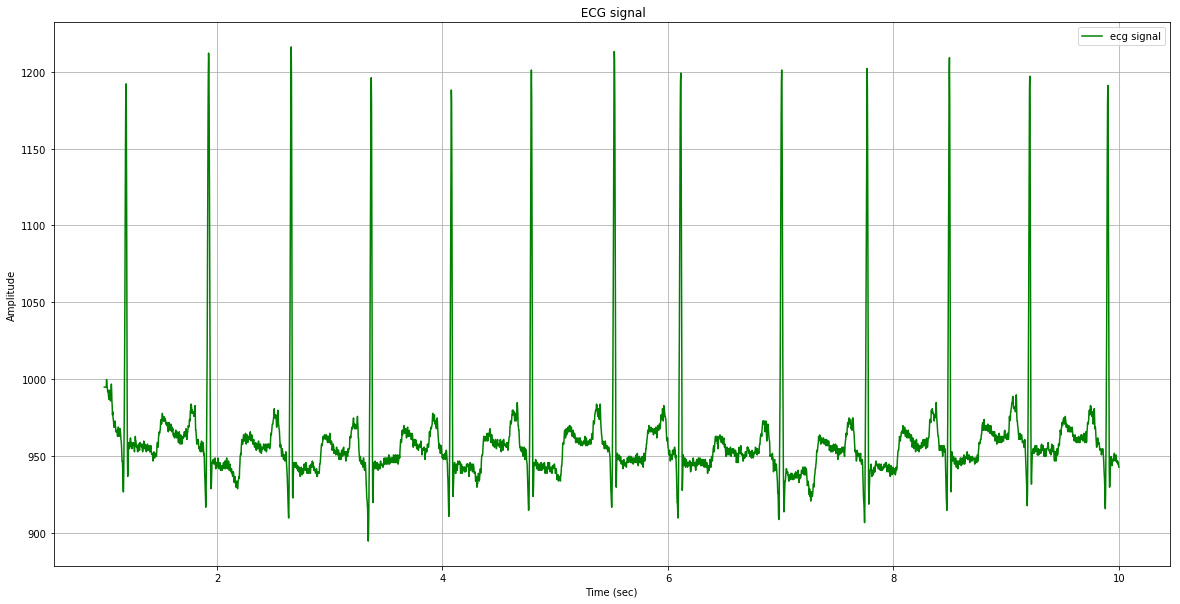

In [ ]:
#loading data
data = sio.loadmat('inputECG.mat')
ecg=np.array(data['inputECG'][0])
print (ecg)
sampling_freq=360
T=1.0/360
t=np.linspace(1,10, sampling_freq*10)
plt.figure(1,figsize=(20,10))
plt.plot(t, ecg.T, 'g')
plt.grid(True)
plt.title(" ECG signal")
plt.xlabel("Time (sec)")
plt.ylabel("Amplitude")
plt.legend(["ecg signal"])
plt.show()

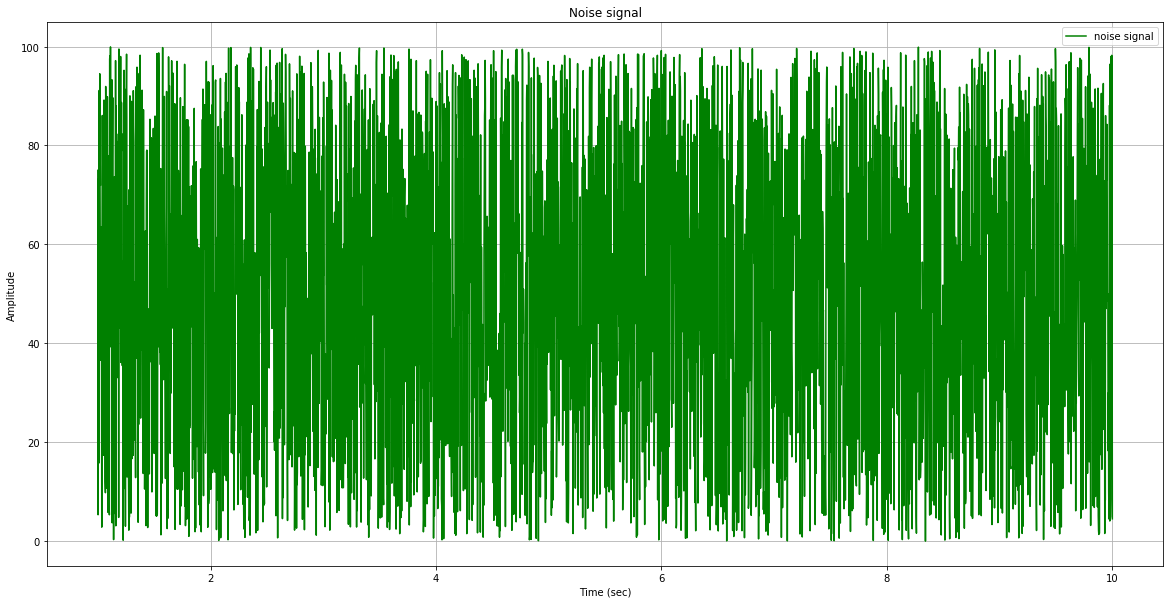

In [ ]:
sampling_freq=360
noise_amp=100
T=1.0/360
noise=np.random.rand(1,3600)*noise_amp
plt.figure(1,figsize=(20,10))
t=np.linspace(1,10, sampling_freq*10)
plt.plot(t, noise.T, 'g')
plt.title("Noise signal")
plt.xlabel("Time (sec)")
plt.ylabel("Amplitude")
plt.legend(["noise signal"])
plt.grid(True)
plt.show()



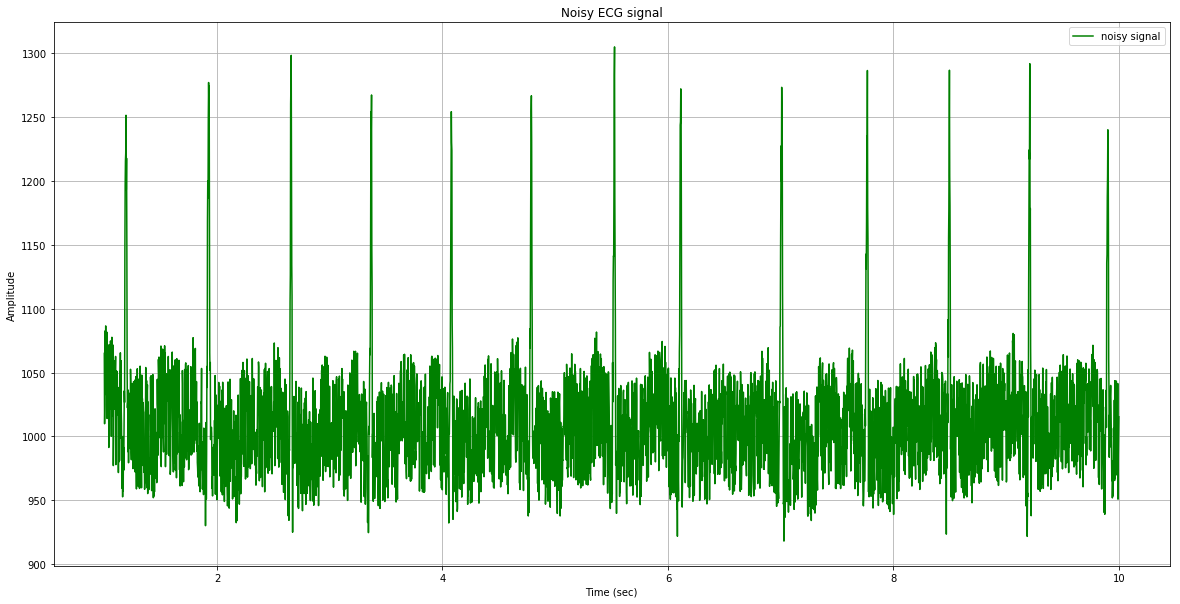

In [ ]:
noisy=np.random.rand(1,3600)*noise_amp+ecg
plt.figure(1,figsize=(20,10))
t=np.linspace(1,10, sampling_freq*10)
plt.plot(t, noisy.T, 'g')
plt.title("Noisy ECG signal")
plt.xlabel("Time (sec)")
plt.ylabel("Amplitude")
plt.legend(["noisy signal"])
plt.grid(True)
plt.show()



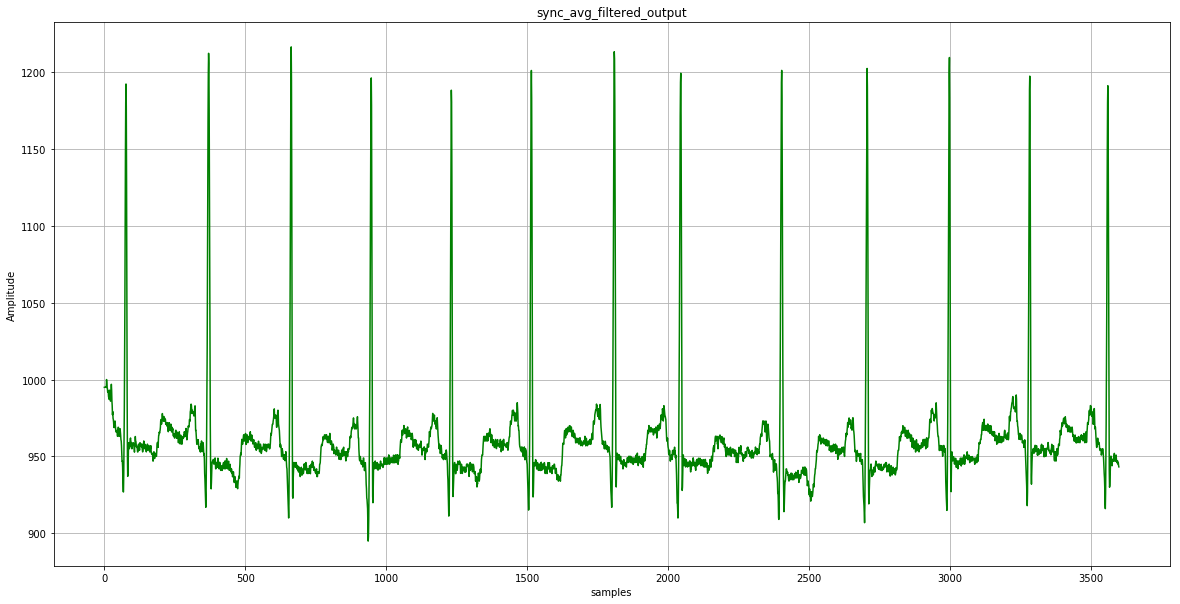

In [ ]:
 #synchronous averaging
for i in range(100):
  x=np.zeros_like(ecg)
  ecg_filtered=0
  for j in range(i+1):
    x=x+(ecg+np.random.normal(0, 1, ecg.shape))/(i+1)
plt.figure(figsize=(20,10))
plt.plot(x,"g")
plt.xlabel("samples")
plt.ylabel("Amplitude")
plt.title("sync_avg_filtered_output")
plt.grid()


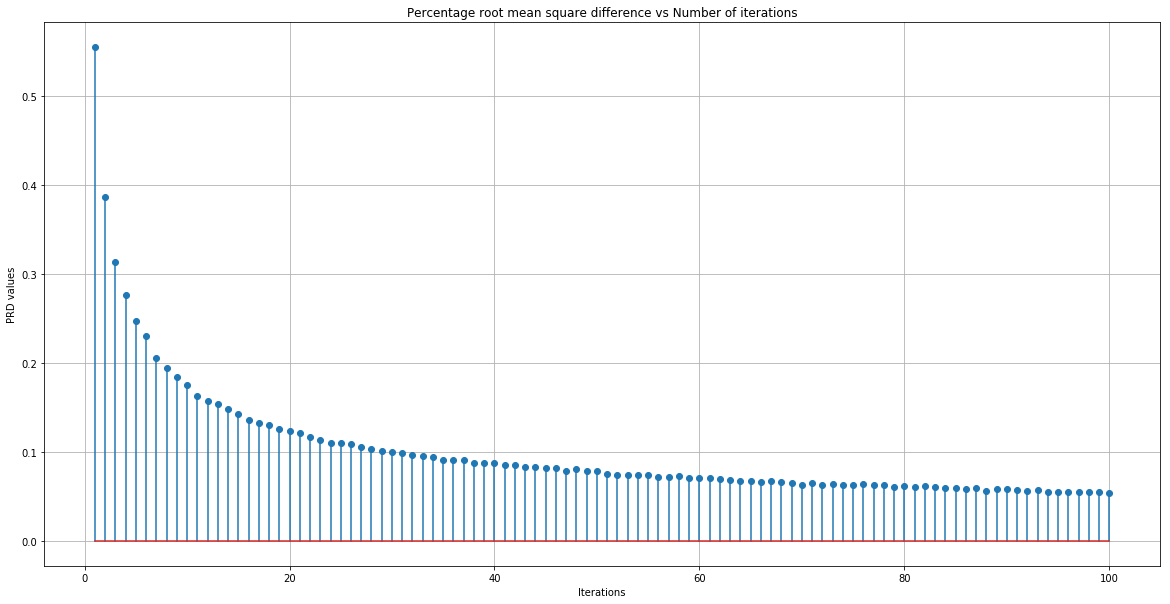

In [ ]:
## FILTERING OPERATION
prd=np.zeros(100)
for i in range(100):
  x=np.zeros_like(ecg)
  ecg_filtered=0
  for j in range(i+1):
    x=x+(ecg+np.random.normal(0, 1, ecg.shape))/(i+1)  #synchronous averaging
  prd[i]=100*(np.sqrt(np.sum((x-ecg)**2)/np.sum(ecg**2)))

t=np.arange(1,101)
plt.figure(1,figsize=(20,10))
plt.stem(t,prd)
plt.grid(True)
plt.xlabel('Iterations')
plt.ylabel('PRD values')
plt.title('Percentage root mean square difference vs Number of iterations')
plt.show()


Q3 Given the ECG signal, “givenECG3.mat”. Thesampling rate is 360 Hz.

(a) Add baseline wander noise (0-1 Hz sinusoid) and power line interference (50 Hz sinusoid) to it. Use various filters to eliminate these noises from ECG.

(b)Compute PRD value between the filtered signal and the original ECG signal for each filtering case.

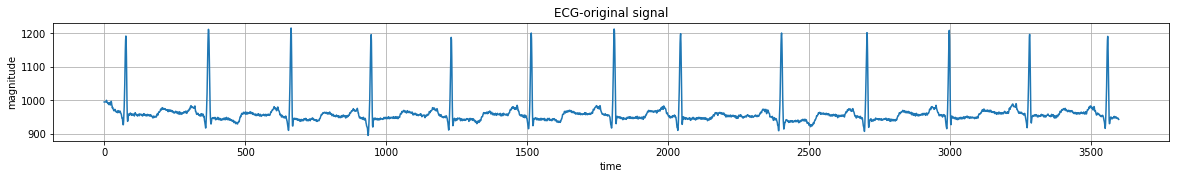

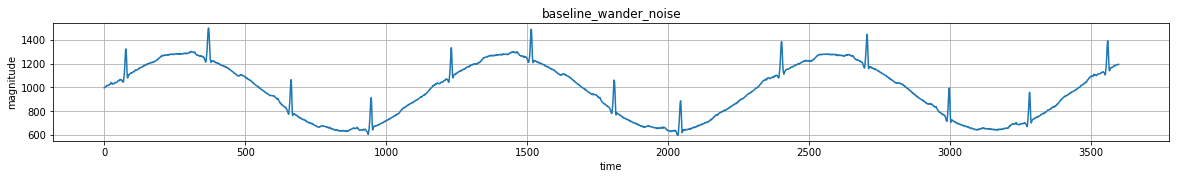

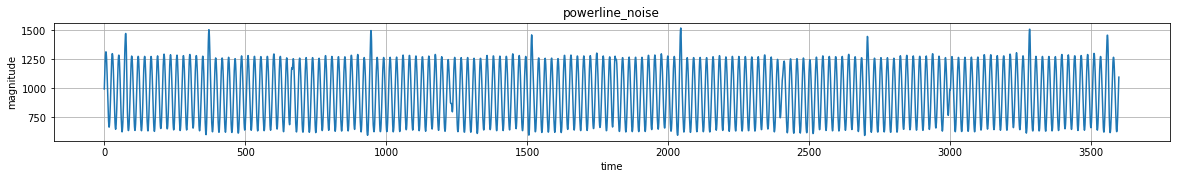

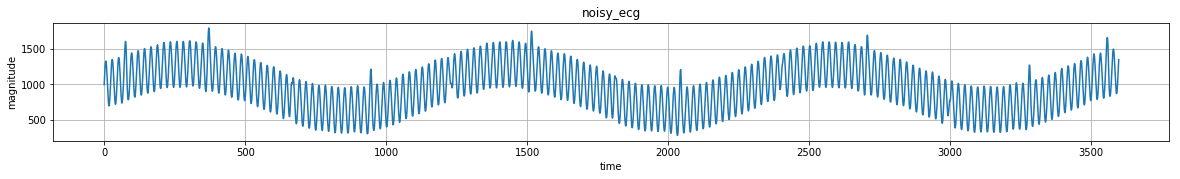

In [ ]:
import numpy as np
import scipy.io as sio
from scipy.signal import find_peaks
import matplotlib.pyplot as plt
from scipy import signal

t = np.linspace(0,np.pi,len(ecg))
baseline_wander= np.sin(2*np.pi*1*t)*(max(ecg)-min(ecg))
baseline_wander_noise=baseline_wander+ecg

powerline= np.sin(2*np.pi*50*t)*(max(ecg)-min(ecg))
powerline_noise=powerline+ecg

noisy_ecg=baseline_wander+powerline+ecg

plt.figure(1,figsize=(20,10))
plt.subplot(4,1,1)
plt.plot(ecg)
plt.title('ECG-original signal')
plt.grid(True)
plt.xlabel('time')
plt.ylabel('magnitude')
plt.show()


plt.figure(2,figsize=(20,10))
plt.subplot(4,1,2)
plt.plot(baseline_wander_noise)
plt.title('baseline_wander_noise')
plt.grid(True)
plt.xlabel('time')
plt.ylabel('magnitude')
plt.show()


plt.figure(3,figsize=(20,10))
plt.subplot(4,1,3)
plt.plot(powerline_noise)
plt.title('powerline_noise')
plt.grid(True)
plt.xlabel('time')
plt.ylabel('magnitude')
plt.show()


plt.figure(3,figsize=(20,10))
plt.subplot(4,1,4)
plt.plot(noisy_ecg)
plt.title('noisy_ecg')
plt.grid(True)
plt.xlabel('time')
plt.ylabel('magnitude')
plt.show()



# Notch Filter

The prd for filtered power line interface signal is 0.43204159012152143


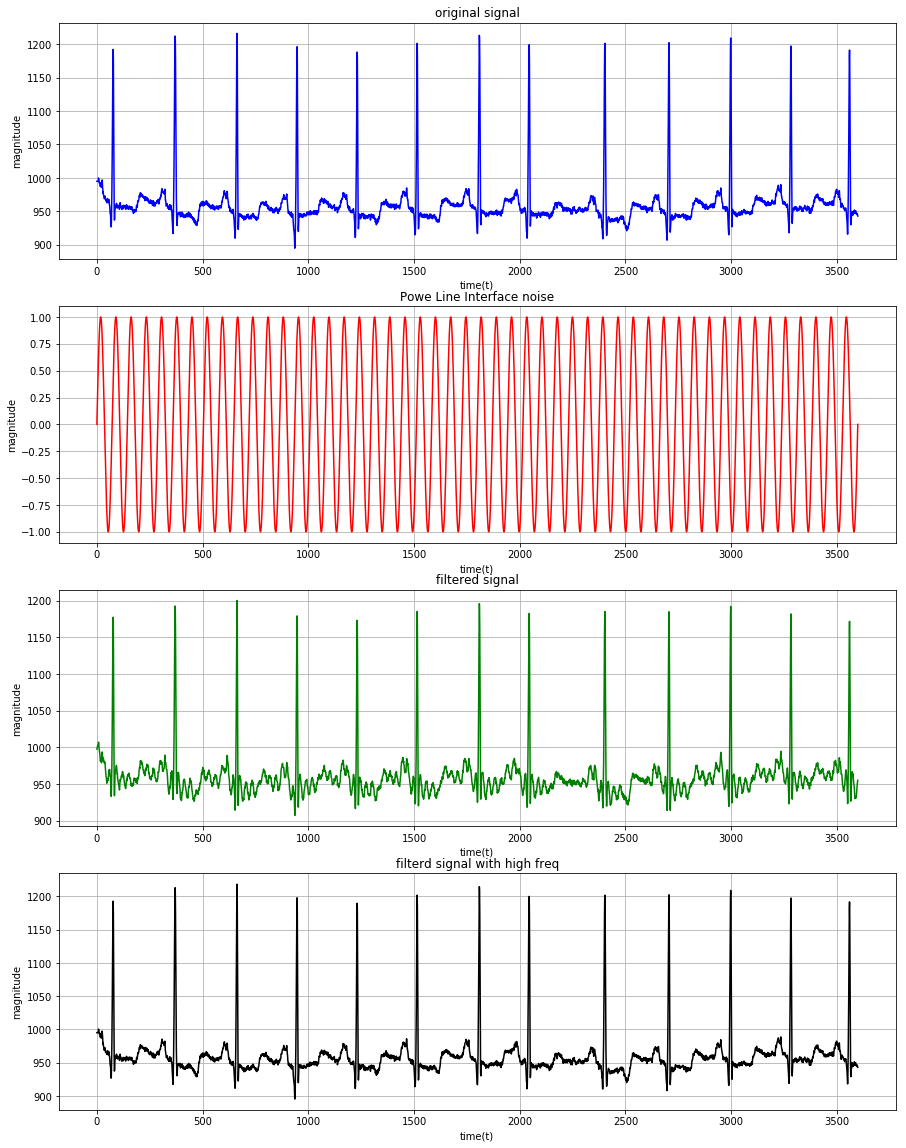

In [ ]:
# power_line interference noise in ECG data
n = np.linspace(0,1,len(ecg))
Signal =np.sin(2*np.pi*50*n)
noisy1 = ecg + Signal

fs = 360  # Sample frequency (Hz) 
notch_freq = 50 # Frequency to be removed from signal (Hz) 
Q =10.0  # Quality factor 
w0=notch_freq/fs*0.5
# Design a notch filter using signal.iirnotch 
b_notch, a_notch = signal.iirnotch(w0, Q ) 
  
# Compute magnitude response of the designed filter 
freq, h = signal.freqz(b_notch, a_notch, fs) 
 # add powerline interfence noise
outputSignal = signal.filtfilt(b_notch, a_notch,noisy1) 


notch_freq = 100 # Frequency to be removed from signal (Hz) 
w0=notch_freq/fs*0.5
# Design a notch filter using signal.iirnotch 
b_notch, a_notch = signal.iirnotch(0.5, Q ) 
  
# Compute magnitude response of the designed filter 
freq, h = signal.freqz(b_notch, a_notch, fs) 
 # add powerline interfence noise
outputSignal_2 = signal.filtfilt(b_notch, a_notch, noisy1) 

c=1
list1=[ecg, Signal,outputSignal, outputSignal_2]
title=['original signal','Powe Line Interface noise','filtered signal', 'filterd signal with high freq']
fig =plt.figure(figsize=(15,20))
color=['b','r','g','k', 'o']
for i in range(4):
    plt.subplot(4,1,c)
    plt.plot(list1[i],c=color[i])
    plt.title(str(title[i]))
    plt.ylabel('magnitude')
    plt.xlabel('time(t)')
    plt.grid()
    c=c+1
    
#prd=np.sqrt(np.sum((outputSignal_2-ecg)**2)/np.sum(ecg**2))*100
numerator = np.sum((ecg - outputSignal_2)**2)
denomator = np.sum(ecg**2)
prd= np.sqrt(numerator/denomator)*100
print("The prd for filtered power line interface signal is",prd)



# High Pass filter

The prd for filtered baseline line wander signal is 5.284703769979361
The prd value high pass filter signal is 5.269789200764161


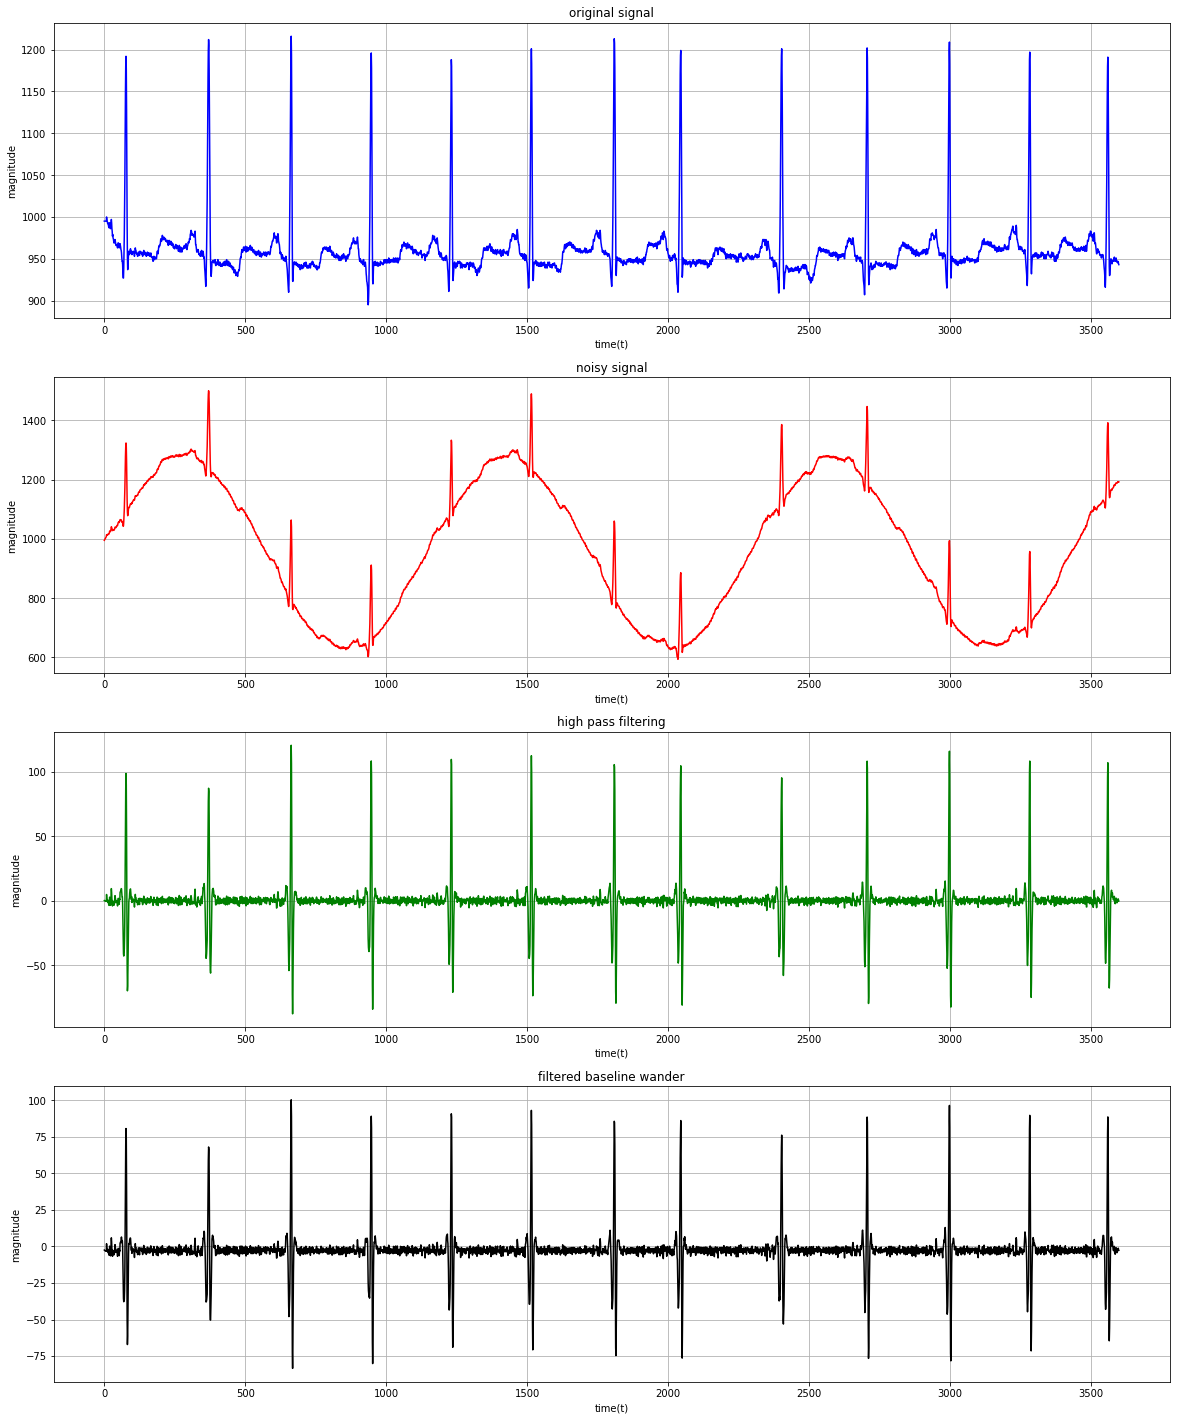

In [ ]:
# Add baseline wander noise 
import heartpy as hp
f=1
t = np.linspace(0,np.pi,len(ecg))
sn = np.sin(2*np.pi*f*t)*(max(ecg)-min(ecg))
noisy1 = ecg+sn
filter1 = hp.filter_signal(noisy1,cutoff=0.5, sample_rate =360, filtertype='highpass')
filter2 = hp.remove_baseline_wander(filter1 ,sample_rate=360,cutoff=0.05)

c=1
list1=[ecg,noisy1,filter1,filter2]
title=['original signal','noisy signal','high pass filtering','filtered baseline wander']
fig =plt.figure(figsize=(20,25))
color=['b','r','g','k']
for i in range(4):
    plt.subplot(4,1,c)
    plt.plot(list1[i],c=color[i])
    plt.title(str(title[i]))
    plt.ylabel('magnitude')
    plt.xlabel('time(t)')
    plt.grid()
    c=c+1
    
numerator = np.sum((ecg - filter2)**2)
denomator = np.sum(ecg**2)
prd= np.sqrt(numerator/denomator)
print("The prd for filtered baseline line wander signal is",prd)
prd=np.sqrt(np.sum((ecg-filter1)**2)/np.sum(ecg**2))
print("The prd value high pass filter signal is",prd)

# Using  Wiener filter


The prd for  filtered baseline wander signal value is 122.99220896221057
The prd for filtered power line interface signal is 0.48962714423211057


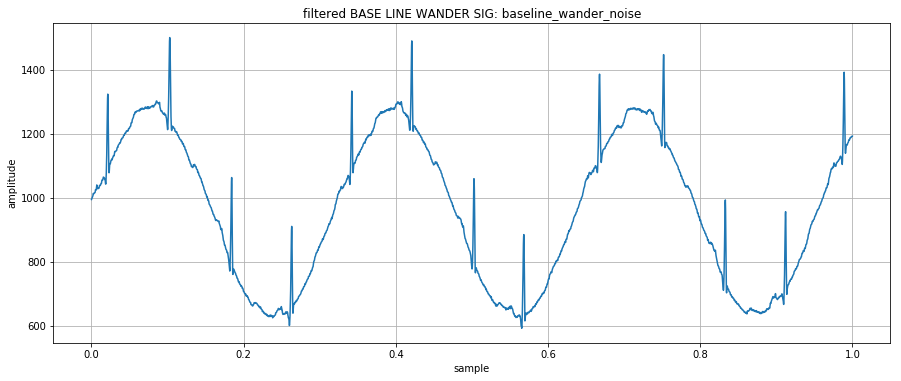

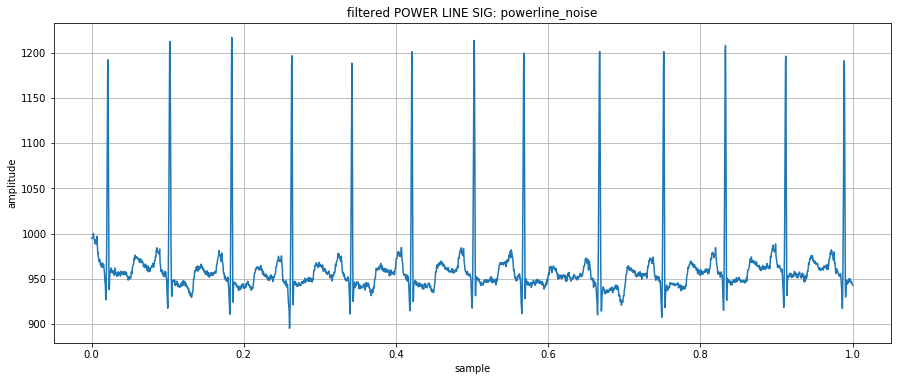

In [ ]:
from scipy import signal as sg
f = 1
t = np.linspace(0,np.pi,len(ecg))
sn = np.sin(2*np.pi*1*t)*(max(ecg)-min(ecg))
noisy1 = ecg+sn

filt1=sg.wiener(noisy1,noise=True)
fig =plt.figure(figsize=(15,20))
plt.subplot(3,1,2)
plt.grid()
plt.plot(n,filt1)
plt.xlabel("sample")
plt.ylabel("amplitude")
plt.title("filtered BASE LINE WANDER SIG: baseline_wander_noise")


n = np.linspace(0,1,len(ecg))
Signal =np.sin(2*np.pi*50*n)
noisy2= ecg + Signal

filt2=sg.wiener(noisy2,noise=True)
fig =plt.figure(figsize=(15,20))
plt.subplot(3,1,3)
plt.grid(True)
plt.plot(n,filt2)
plt.xlabel("sample")
plt.ylabel("amplitude")
plt.title("filtered POWER LINE SIG: powerline_noise")



numerator = np.sum((ecg - filt1)**2)
denomator = np.sum(ecg**2)
prd= np.sqrt(numerator/denomator)*100
print("The prd for  filtered baseline wander signal value is",prd)

numerator = np.sum((ecg - filt2)**2)
denomator = np.sum(ecg**2)
prd= np.sqrt(numerator/denomator)*100
print("The prd for filtered power line interface signal is",prd)


PRD value of original signal and high pass  filter signal is : 5.269789200764161
PRD value of original signal and baseline wander  filter signal is : 5.284703769979361
PRD value of original signal and notch   filter signal is : 0.05766543647534356


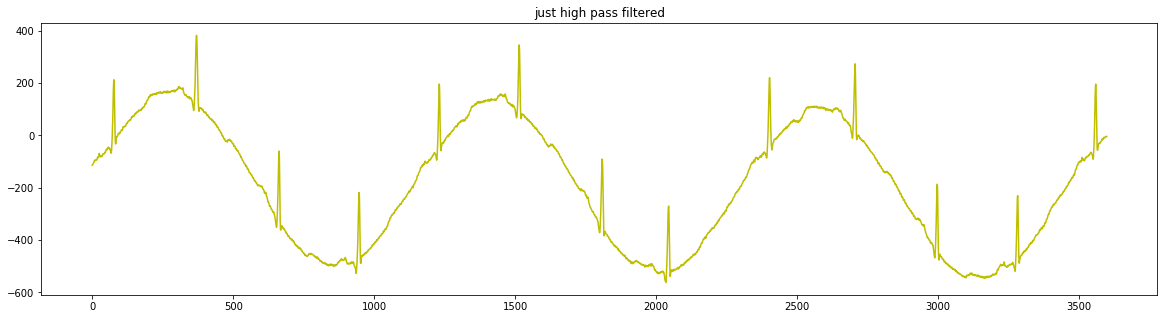

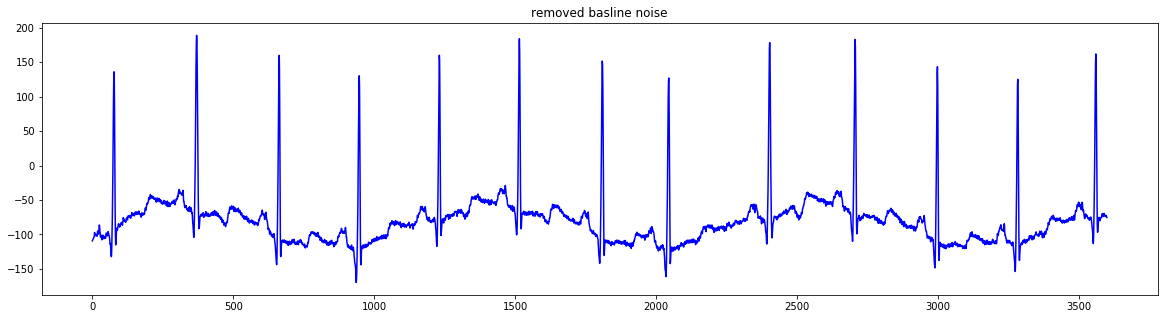

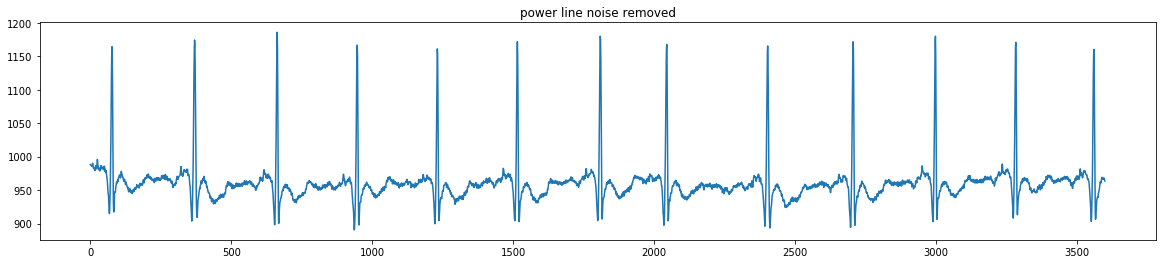

In [ ]:
#High pass Filter
import heartpy as hp

f = 1
t = np.linspace(0,np.pi,len(ecg))
sn = np.sin(2*np.pi*1*t)*(max(ecg)-min(ecg))
sig1 = ecg+sn

filtered1 = hp.filter_signal(sig1,cutoff=0.05,sample_rate =3600, filtertype='highpass')
filtered2 = hp.remove_baseline_wander(filtered1,sample_rate=3600,cutoff=0.05)
plt.figure(figsize=(20,5))
plt.title("just high pass filtered")
plt.plot(filtered1,"y")
plt.figure(figsize=(20,5))
plt.plot(filtered2,"b")
plt.title("removed basline noise")





#notch
n = np.linspace(0,1,len(ecg))
Signal =np.sin(2*np.pi*50*n)
noisy2= ecg + Signal

plt.figure(figsize=(20,4))
plt.title("power line noise removed")
b_notch, a_notch = sg.iirnotch(50, 2 ,3600)              #need to maintain quality factor otw distotion would increase
freq, h = sg.freqz(b_notch, a_notch, 3600) 
outputSignal = sg.filtfilt(b_notch, a_notch, noisy2) 
plt.plot(outputSignal)



def PRD(original_signal, filtered_signal):
    numerator = np.sum((original_signal - filtered_signal)**2)
    denomator = np.sum(original_signal**2)
    result = np.sqrt(numerator/denomator)
    return result

list1=[filter1,filter2,outputSignal]
name=['high pass ','baseline wander ','notch  ']
prd=[PRD(ecg,i) for i in list1]

for j in range(3):
    print("PRD value of original signal and " +str(name[j])+ " filter signal is :",prd[j])
    
    

# Notch Filter

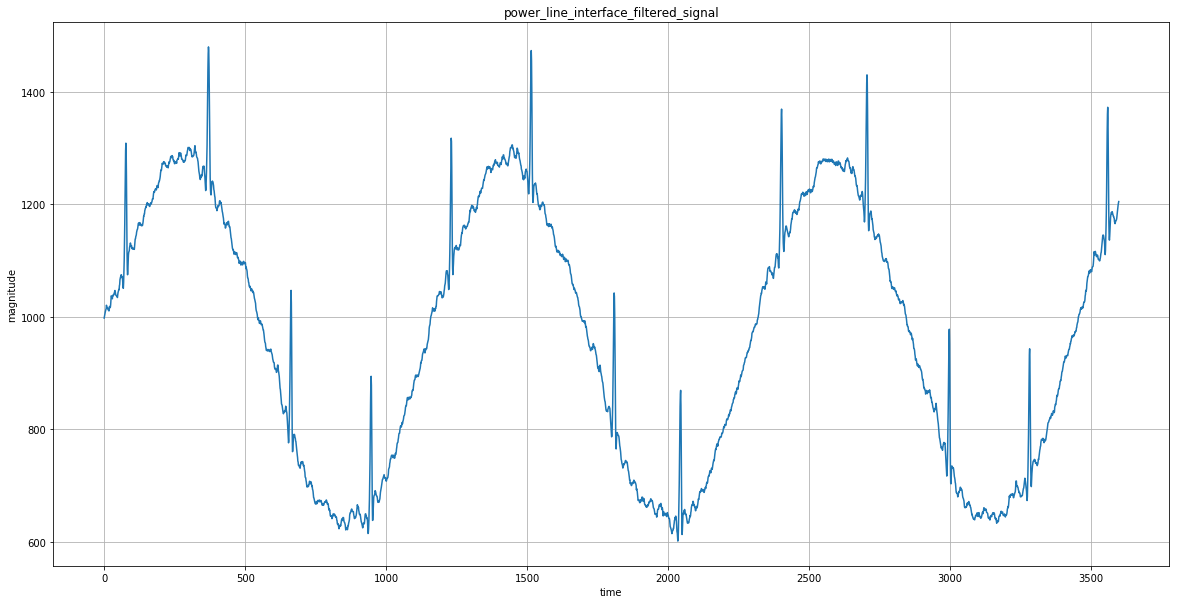

The prd for power line interface value is 123.04968171430745


In [ ]:
#Filtering
import numpy as np
import scipy.io as sio
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt
import heartpy as hp
from scipy import signal 
from scipy.signal import butter, filtfilt, iirnotch
import numpy as np
fs = 360.0  # Sample frequency (Hz)
f0 = 50.0  # Frequency to be removed from signal (Hz)
Q = 10.0  # Quality factor
# Design notch filter
w0 = (f0 / fs *0.5)  # Normalized Frequency
b, a = signal.iirnotch(w0, Q)
#b, a = signal.iirnotch(f0, Q, fs=fs)
# Frequency response
freq, h = signal.freqz(b, a, fs)
# Notch filter used to remove power line noise
filtered_signal= signal.filtfilt(b, a, noisy1) 
plt.figure(1,figsize=(20,10))
#plt.subplot(3,1,3)
plt.plot(filtered_signal)
plt.title('power_line_interface_filtered_signal')
plt.grid(True)
plt.xlabel('time')
plt.ylabel('magnitude')
plt.show()

prd=np.sqrt(np.sum((filtered_signal-ecg)**2)/np.sum(ecg**2))*100
print("The prd for power line interface value is",prd)


#  BUTTERWORTH FILTER


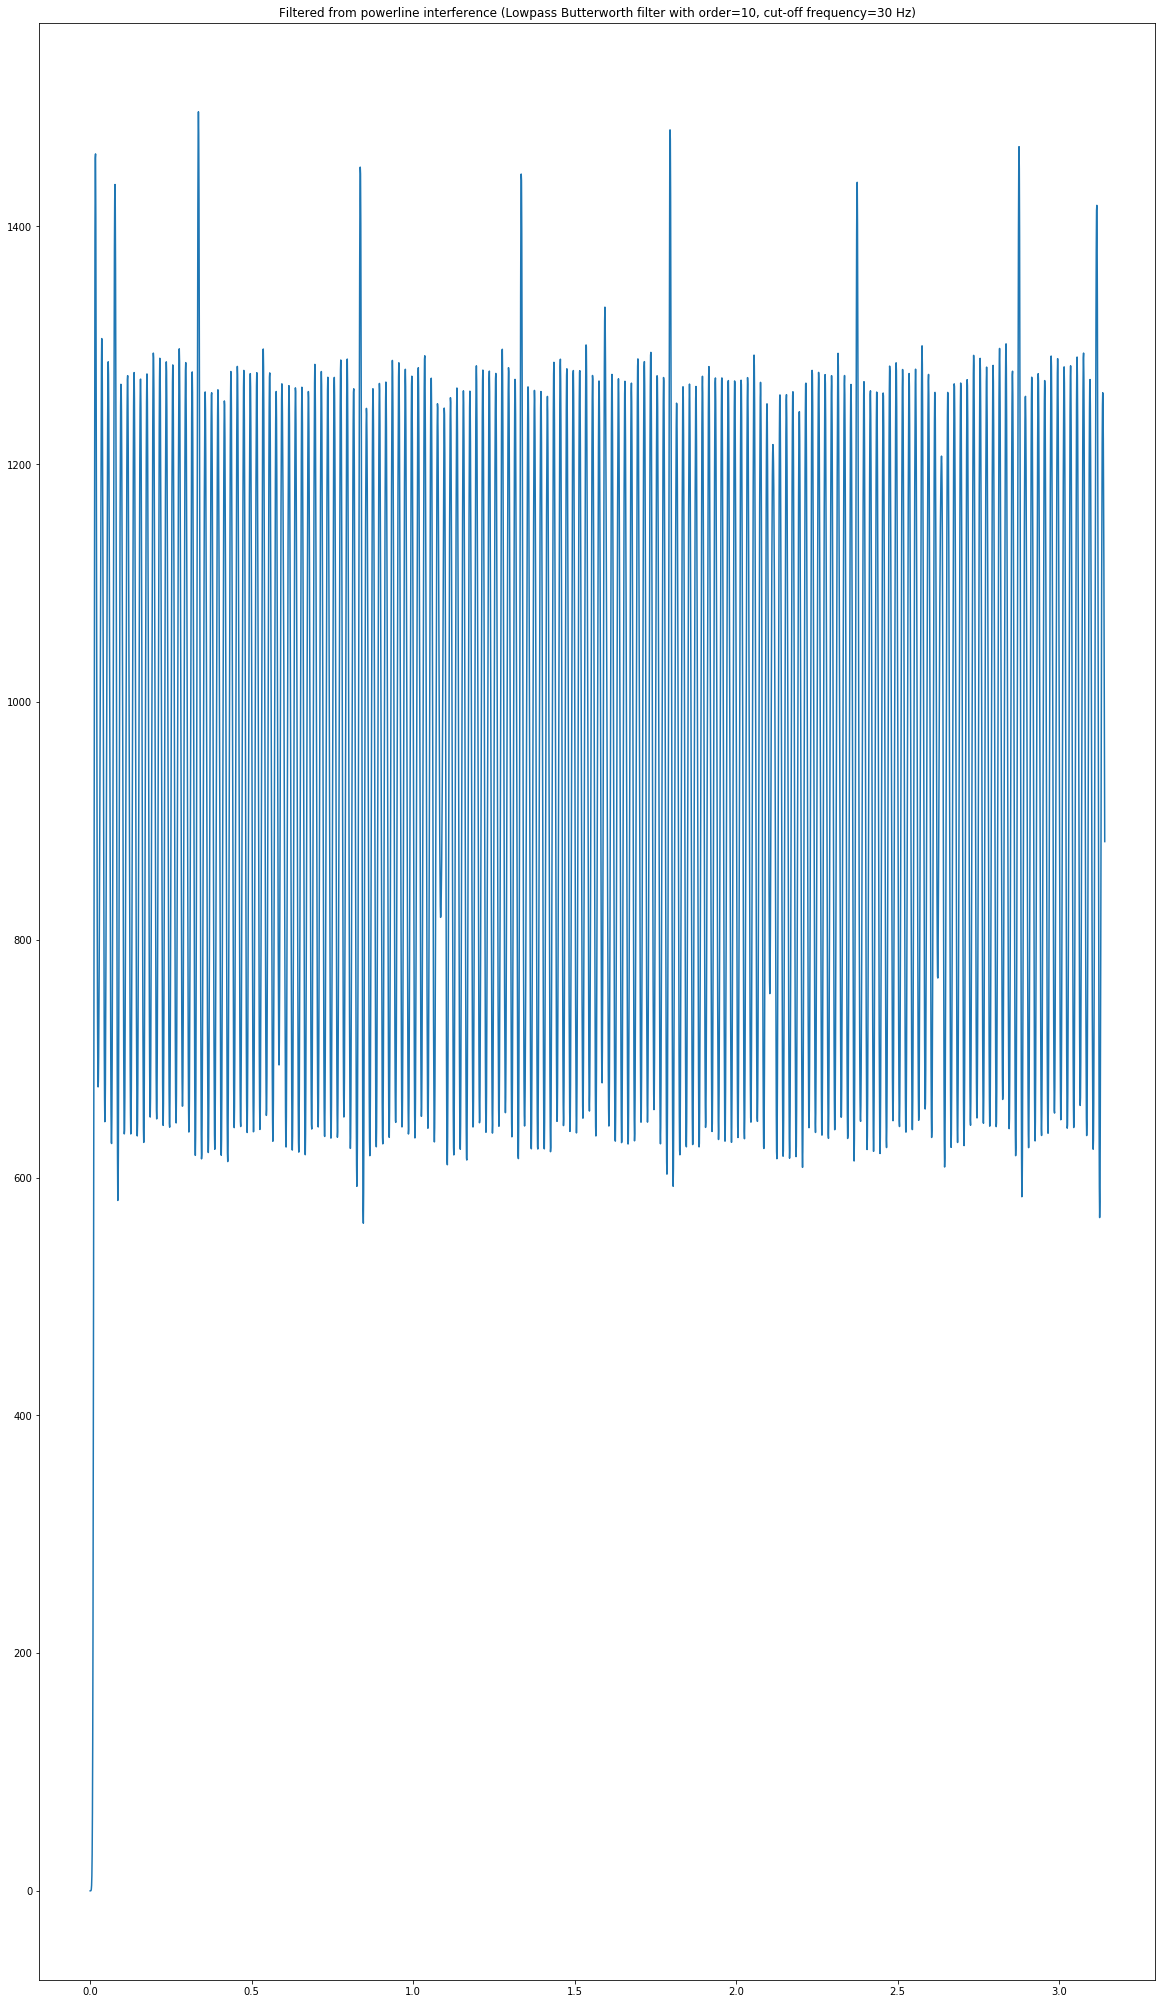

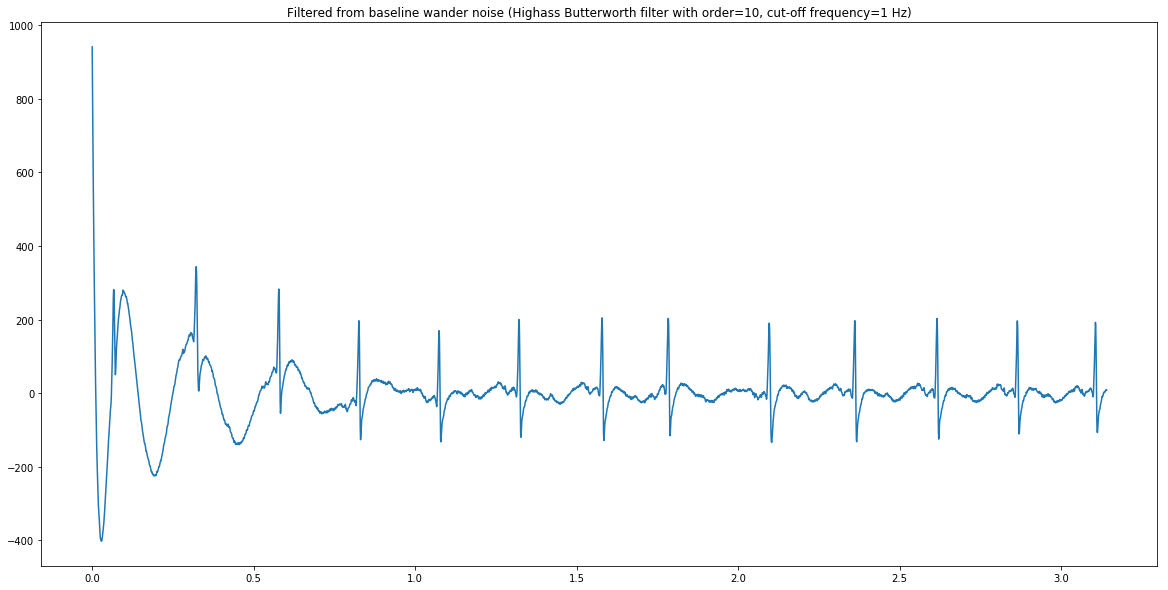

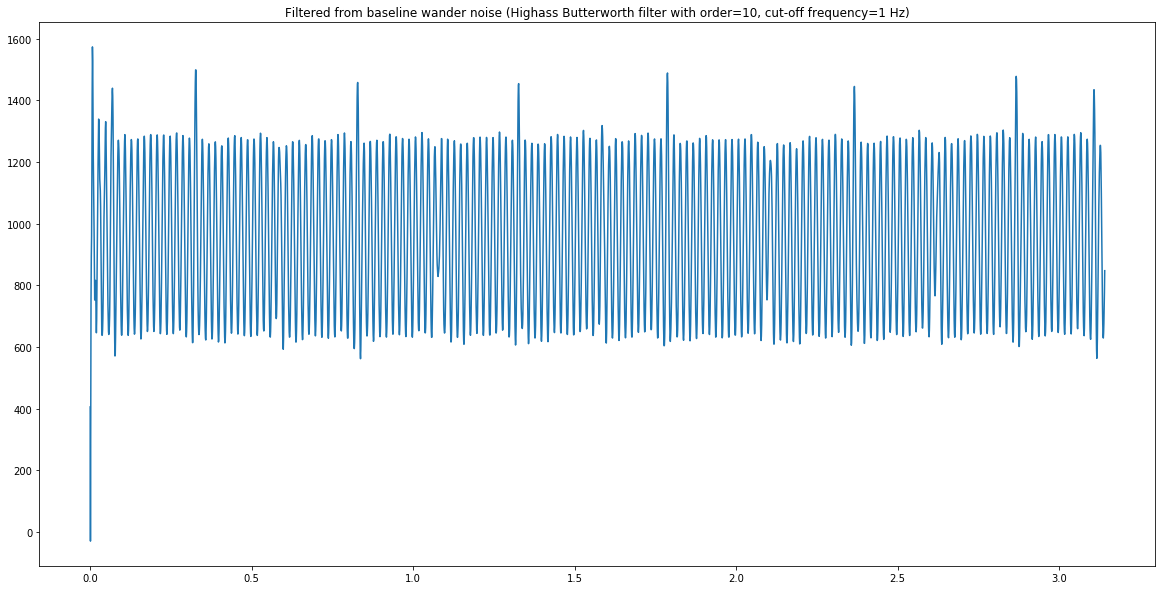

In [ ]:
# BUTTERWORTH FILTER

from scipy import signal
import matplotlib.pyplot as plt

#removal of powerline interference
order=10
cut_off_low=30
sos= signal.butter(order,cut_off_low,btype='lowpass',output='sos',fs=360)
pwr_filtered=signal.sosfilt(sos,powerline_noise)

#removal of baseline wander
order=10
cut_off_high=1
sos= signal.butter(order,cut_off_high,btype='highpass',output='sos',fs=360)
baseline_filtered=signal.sosfilt(sos,baseline_wander_noise)

order=10
sos= signal.butter(order,(42,58),btype='bandstop',output='sos',fs=360)
noisy_filtered=signal.sosfilt(sos,powerline_noise)


plt.figure(figsize=(20,36))
plt.plot(t,pwr_filtered.T)
plt.title(f'Filtered from powerline interference (Lowpass Butterworth filter with order={order}, cut-off frequency={cut_off_low} Hz)')
plt.show()

plt.figure(figsize=(20,10))
plt.plot(t,baseline_filtered.T)
plt.title(f'Filtered from baseline wander noise (Highass Butterworth filter with order={order}, cut-off frequency={cut_off_high} Hz)')
plt.show()

plt.figure(figsize=(20,10))
plt.plot(t,noisy_filtered.T)
plt.title(f'Filtered from baseline wander noise (Highass Butterworth filter with order={order}, cut-off frequency={cut_off_high} Hz)')
plt.show()

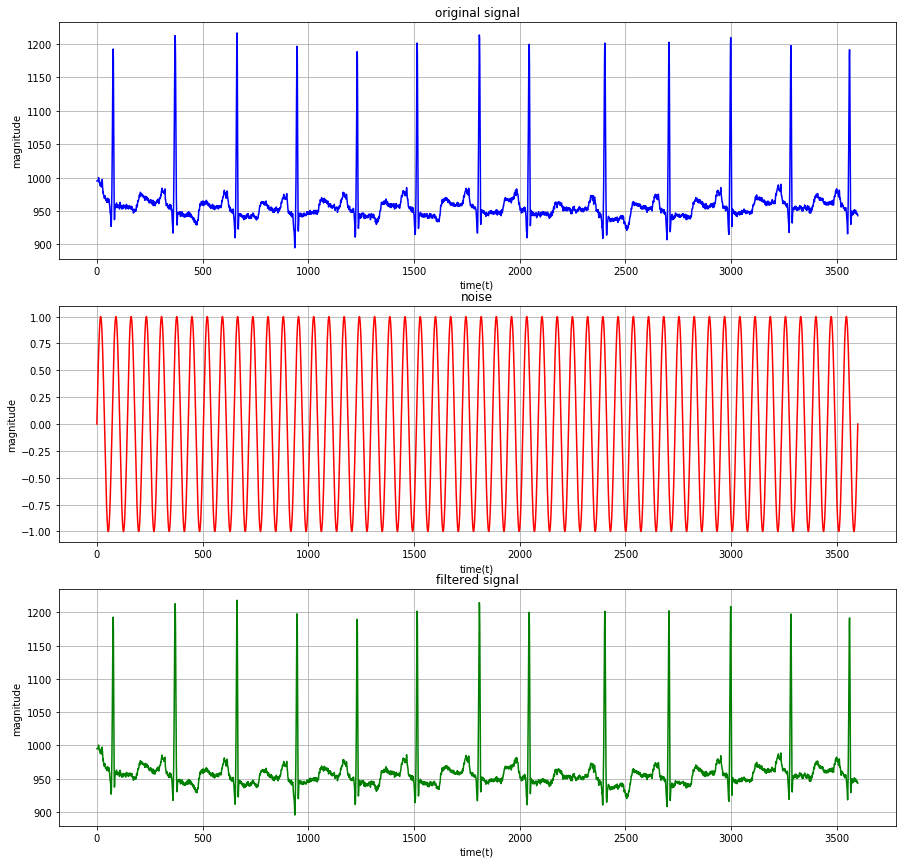

In [ ]:
# power_line interference noise in ECG data
n = np.linspace(0,1,len(ecg))
Signal =np.sin(2*np.pi*50*n)
noisy1 = ecg + Signal

fs = 360  # Sample frequency (Hz) 
notch_freq = 50 # Frequency to be removed from signal (Hz) 
Q =10.0  # Quality factor 
w0=0.5
# Design a notch filter using signal.iirnotch 
b_notch, a_notch = signal.iirnotch(w0, Q ) 
  
# Compute magnitude response of the designed filter 
freq, h = signal.freqz(b_notch, a_notch, fs) 
 # add powerline interfence noise
outputSignal = signal.filtfilt(b_notch, a_notch,noisy1) 


c=1
list1=[ecg,Signal,outputSignal]
title=['original signal','noise','filtered signal']
fig =plt.figure(figsize=(15,20))
color=['b','r','g','k']
for i in range(3):
    plt.subplot(4,1,c)
    plt.plot(list1[i],c=color[i])
    plt.title(str(title[i]))
    plt.ylabel('magnitude')
    plt.xlabel('time(t)')
    plt.grid()
    c=c+1

1199
[1192, 1177, 1128, 1058, 991, 951, 937, 939, 950, 958, 959, 957, 955, 958, 959, 961, 962, 960, 957, 956, 959, 955, 957, 958, 957, 958, 959, 958, 958, 955, 953, 957, 959, 963, 960, 960, 958, 956, 957, 956, 955, 953, 953, 956, 958, 958, 958, 956, 954, 959, 959, 958, 958, 957, 957, 956, 958, 956, 954, 953, 954, 955, 958, 960, 957, 958, 955, 958, 957, 957, 955, 955, 953, 956, 956, 957, 958, 954, 954, 955, 957, 957, 957, 954, 953, 953, 955, 955, 957, 954, 952, 952, 952, 951, 952, 950, 947, 950, 952, 953, 952, 949, 949, 951, 951, 952, 952, 951, 950, 953, 958, 959, 959, 957, 956, 961, 964, 964, 966, 965, 966, 967, 969, 973, 974, 974, 971, 973, 975, 978, 975, 975, 973, 973, 976, 974, 973, 975, 973, 974, 974, 971, 972, 972, 971, 970, 971, 972, 969, 968, 966, 969, 970, 972, 968, 968, 967, 969, 969, 971, 970, 967, 966, 968, 969, 967, 968, 964, 964, 963, 965, 964, 962, 962, 963, 965, 967, 967, 966, 965, 962, 966, 965, 964, 963, 962, 959, 962, 964, 966, 962, 959, 958, 961, 964, 963, 962, 960, 

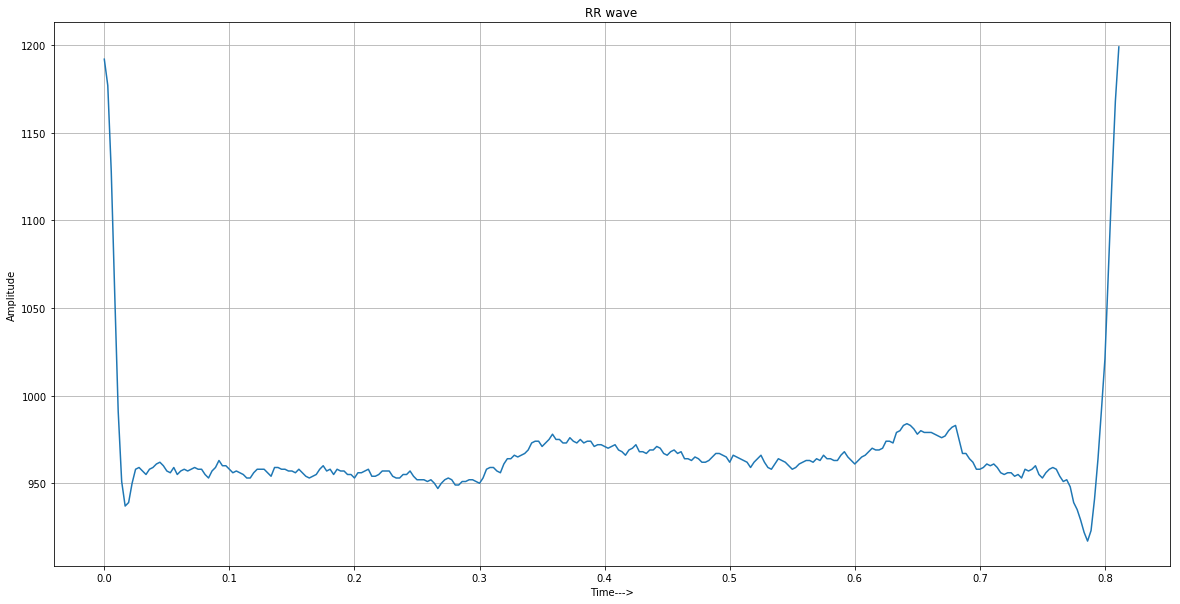

In [ ]:

#First RR signal
RR=[]
for i in range(R_peaks[0], R_peaks[1]):
  RR.append(ecg[i])
print(ecg[i])
print(RR)
T=1.0/360
t=np.arange(0, len(RR)*T, T)
plt.figure(1,figsize=(20,10))
plt.plot(t,RR)
plt.title("RR wave")
plt.xlabel("Time--->")
plt.ylabel("Amplitude")
plt.grid(True)
